In [15]:
# importing module
from pandas import *
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from helper760_part3 import read_inputs
from gain import gain
# Let's read all data and preprocess them
Clininc_Data,Outcome_Data,CT_Data = read_inputs()
#X contains CT_Data
X = np.array(CT_Data)
X = X.T
X = X.astype(float)
print(np.count_nonzero(np.isnan(X[:,10])))
print(np.shape(X))
#O contains outcomes
O = np.array(Outcome_Data)
O = O.T
O = O.astype(float)
#D contains death day
D = O[:,0]
print(np.shape(D))
print(np.count_nonzero(np.isnan(D)))
# combine deathday column with CT data to perform gain imputation
I = np.column_stack((D,X))# first column is death day, the rest colmuns are CT_DATA cols
print(np.shape(I))
print(I)
#use gain
gain_para = {"batch_size": 128, 
                "hint_rate":0.9,
               "alpha":100,
            "iterations":10000}
updatedI = gain(I,gain_para)
np.savetxt("gainOutCome.csv", updatedI, fmt='%.2f',delimiter=",")

74
(9223, 11)
(9223,)
8674
(9223, 12)
[[ 967.   135.     nan ...   58.7 5473.6   35. ]
 [ 359.   192.   485.5 ...   48.4 2709.1   52. ]
 [   nan  256.   490.1 ...   50.1    0.    54. ]
 ...
 [   nan  135.   822.3 ...   57.8 1116.    45. ]
 [   nan  219.   418.2 ...   50.9 3515.4   44. ]
 [   nan  151.    61.5 ...   29.7 3015.1   54. ]]


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:27<00:00, 361.18it/s]


0


(array([  67.,   99.,  229.,  658., 1616., 3710., 2539.,  233.,   50.,
          22.]),
 array([   9. ,  515.1, 1021.2, 1527.3, 2033.4, 2539.5, 3045.6, 3551.7,
        4057.8, 4563.9, 5070. ]),
 <BarContainer object of 10 artists>)

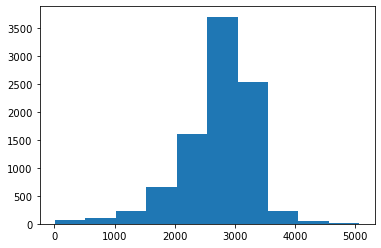

In [17]:
import matplotlib.pyplot as plt
print(np.count_nonzero(np.isnan(updatedI)))
deathday = updatedI[:,0].astype(int)
plt.hist(deathday)# hist of death day